In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set(color_codes=True)

In [4]:
df_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df_counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [5]:
df_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [6]:
df_states = df_states.sort_values(by=['state', 'date'])
df_states_mat = df_states.pivot_table(index='date', columns='state', values='cases')
df_states_mat.fillna(0, inplace=True)
df_states_mat.head()

for col in df_states_mat.columns:
    df_states_mat[col + ' new cases'] = df_states_mat[col].diff()
df_states_mat.sort_values('date', ascending=False).head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee new cases,Texas new cases,Utah new cases,Vermont new cases,Virgin Islands new cases,Virginia new cases,Washington new cases,West Virginia new cases,Wisconsin new cases,Wyoming new cases
date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,7888.0,366.0,8640.0,3431.0,55072.0,16527.0,29287.0,5208.0,5016.0,36070.0,...,489.0,866.0,194.0,11.0,0.0,940.0,327.0,11.0,304.0,6.0
2020-05-02,7611.0,363.0,8364.0,3372.0,53753.0,16118.0,29287.0,5038.0,4797.0,35455.0,...,592.0,1091.0,152.0,7.0,0.0,830.0,243.0,33.0,346.0,9.0
2020-05-01,7294.0,362.0,7962.0,3310.0,52318.0,15661.0,28764.0,4918.0,4658.0,34720.0,...,1291.0,1267.0,157.0,13.0,0.0,1055.0,314.0,26.0,460.0,5.0
2020-04-30,7068.0,353.0,7648.0,3281.0,50470.0,15207.0,27700.0,4734.0,4323.0,33683.0,...,250.0,1236.0,173.0,4.0,0.0,885.0,318.0,16.0,334.0,11.0
2020-04-29,6925.0,353.0,7202.0,3207.0,48904.0,14680.0,26767.0,4655.0,4106.0,33185.0,...,281.0,971.0,156.0,0.0,7.0,622.0,319.0,14.0,231.0,8.0


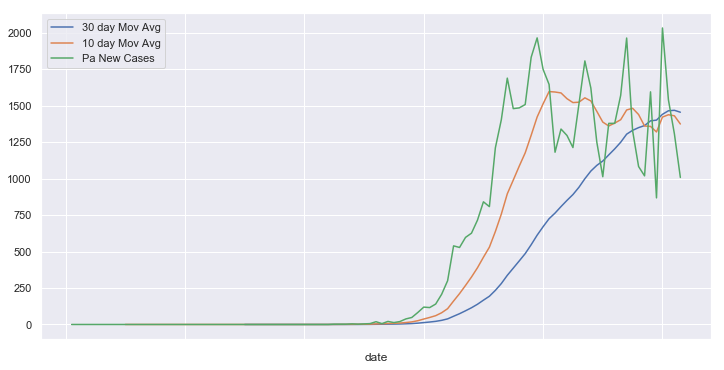

In [7]:
plt.figure(figsize=(12,6))
df_states_mat['Pennsylvania new cases'].rolling(window=30).mean().plot(label='30 day Mov Avg')
df_states_mat['Pennsylvania new cases'].rolling(window=10).mean().plot(label='10 day Mov Avg')
df_states_mat['Pennsylvania new cases'].plot(label='Pa New Cases')
plt.legend()

In [8]:
from datetime import datetime

In [9]:
df_totals = df_states.drop('fips', axis=1).groupby('date').sum().sort_values('date')
df_totals['date_ordinal'] = df_totals.index.map(lambda x: datetime.strptime(x, '%Y-%m-%d').toordinal() - 737470)
df_totals['new cases'] = df_totals['cases'].diff()
df_totals['new deaths'] = df_totals['deaths'].diff()
df_totals['cases pct chg'] = df_totals['cases'].pct_change() * 100
df_totals['deaths pct chg'] = df_totals['deaths'].pct_change() * 100
df_totals['new cases pct chg'] = df_totals['new cases'].pct_change() * 100
df_totals['new deaths pct chg'] = df_totals['new deaths'].pct_change() * 100
df_totals = df_totals.replace([np.inf, -np.inf], 1)
df_totals = df_totals.round(1)
df_totals = df_totals.loc['2020-03-01':]

In [10]:
df_totals.fillna(0.0, inplace=True)
df_totals.sort_values(by='date', ascending=False).head(10)

,cases,deaths,date_ordinal,new cases,new deaths,cases pct chg,deaths pct chg,new cases pct chg,new deaths pct chg
date,,,,,,,,,
2020-05-03,1158655,62140,78,25572.0,1063.0,2.3,1.7,-13.4,-36.9
2020-05-02,1133083,61077,77,29539.0,1685.0,2.7,2.8,-13.1,-7.5
2020-05-01,1103544,59392,76,33985.0,1822.0,3.2,3.2,11.8,-16.1
2020-04-30,1069559,57570,75,30393.0,2171.0,2.9,3.9,14.3,-8.2
2020-04-29,1039166,55399,74,26594.0,2365.0,2.6,4.5,8.9,6.8
2020-04-28,1012572,53034,73,24429.0,2215.0,2.5,4.4,6.5,63.5
2020-04-27,988143,50819,72,22929.0,1355.0,2.4,2.7,-13.4,19.0
2020-04-26,965214,49464,71,26464.0,1139.0,2.8,2.4,-22.5,-37.5
2020-04-25,938750,48325,70,34146.0,1822.0,3.8,3.9,-6.7,-8.3


In [11]:
df_totals.describe()

,cases,deaths,date_ordinal,new cases,new deaths,cases pct chg,deaths pct chg,new cases pct chg,new deaths pct chg
count,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,3.748687e+05,17081.171875,46.500000,18102.890625,970.921875,17.142187,20.829687,18.475000,14.103125
std,3.905131e+05,20688.010064,18.618987,13220.889403,898.400718,13.597010,27.714335,39.422143,39.095301
min,8.800000e+01,3.000000,15.000000,16.000000,0.000000,2.300000,0.000000,-28.000000,-100.000000
25%,5.555500e+03,109.750000,30.750000,1275.250000,24.500000,4.500000,6.400000,-1.200000,-8.225000
50%,2.293725e+05,5396.500000,46.500000,24444.500000,996.500000,13.950000,16.250000,9.500000,10.600000
75%,7.069132e+05,33364.750000,62.250000,29467.750000,1828.000000,28.050000,26.725000,25.225000,32.775000
max,1.158655e+06,62140.000000,78.000000,36585.000000,2521.000000,48.400000,200.000000,260.000000,187.500000


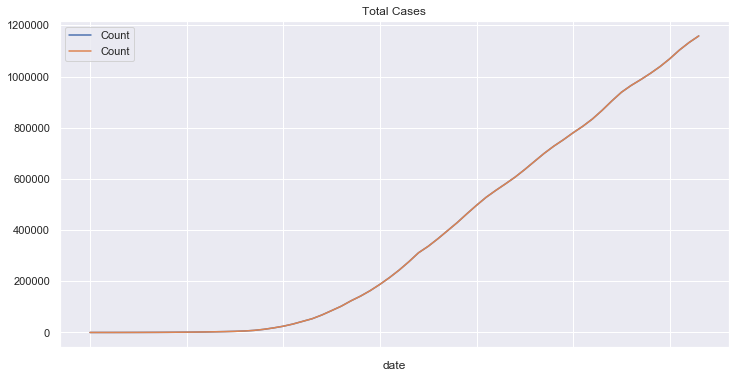

In [12]:
plt.figure(figsize=(12,6))
df_totals['cases'].plot(label='Count')
df_totals['cases'].plot(label='Count')
plt.title('Total Cases')
plt.legend()

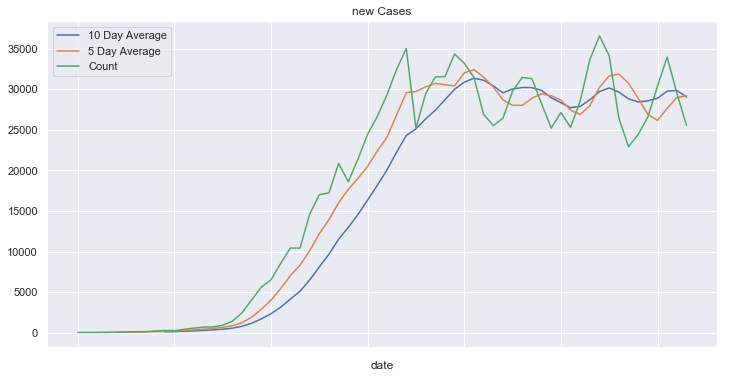

In [13]:
plt.figure(figsize=(12,6))
df_totals['new cases'].rolling(window=10).mean().plot(label='10 Day Average')
df_totals['new cases'].rolling(window=5).mean().plot(label='5 Day Average')
df_totals['new cases'].plot(label='Count')
plt.title('new Cases')
plt.legend()

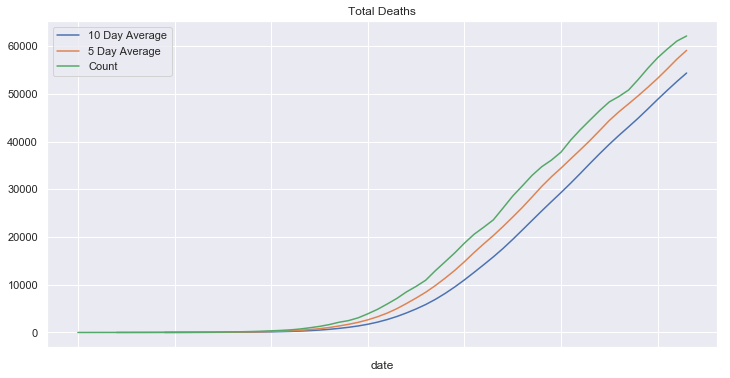

In [14]:
plt.figure(figsize=(12,6))
df_totals['deaths'].rolling(window=10).mean().plot(label='10 Day Average')
df_totals['deaths'].rolling(window=5).mean().plot(label='5 Day Average')
df_totals['deaths'].plot(label='Count')
plt.title('Total Deaths')
plt.legend()

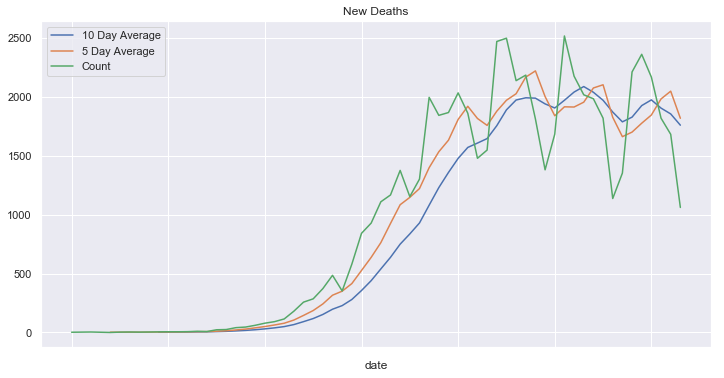

In [15]:
plt.figure(figsize=(12,6))
df_totals['new deaths'].rolling(window=10).mean().plot(label='10 Day Average')
df_totals['new deaths'].rolling(window=5).mean().plot(label='5 Day Average')
df_totals['new deaths'].plot(label='Count')
plt.title('New Deaths')
plt.legend()

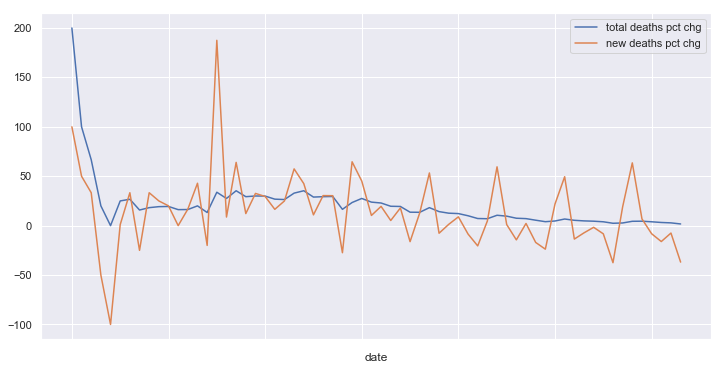

In [16]:
plt.figure(figsize=(12,6))
df_totals['deaths pct chg'].plot(label='total deaths pct chg')
df_totals['new deaths pct chg'].plot()
plt.legend()

/Users/dderman/.conda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


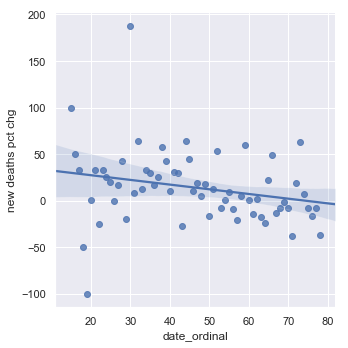

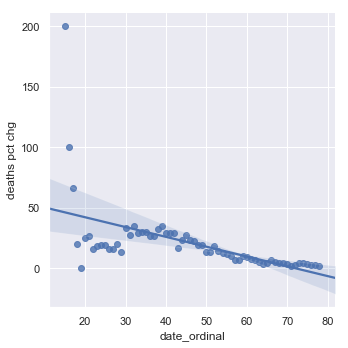

In [17]:
sns.lmplot(x='date_ordinal', y='new deaths pct chg', data=df_totals, fit_reg=True)
sns.lmplot(x='date_ordinal', y='deaths pct chg', data=df_totals, fit_reg=True)

In [18]:
df_counties.groupby('county').max().sort_values('cases', ascending=False)

,date,state,fips,cases,deaths
county,,,,,
New York City,2020-05-03,New York,NaN,174341,13064
Cook,2020-05-03,Illinois,17031.0,42324,1786
Nassau,2020-05-03,New York,36059.0,36780,2194
Suffolk,2020-05-03,New York,36103.0,34855,1309
Westchester,2020-05-03,New York,36119.0,29884,1203
Los Angeles,2020-05-03,California,6037.0,25662,1229
Wayne,2020-05-03,West Virginia,54099.0,17298,1893
Bergen,2020-05-03,New Jersey,34003.0,16185,1210
Philadelphia,2020-05-03,Pennsylvania,42101.0,15854,727


In [19]:
df_states.groupby('state').max().sort_values('deaths', ascending=False)

,date,fips,cases,deaths
state,,,,
New York,2020-05-03,36,316446,19189
New Jersey,2020-05-03,34,126744,7871
Michigan,2020-05-03,26,43736,4049
Massachusetts,2020-05-03,25,68087,4004
Pennsylvania,2020-05-03,42,52079,2843
Illinois,2020-05-03,17,61499,2632
Connecticut,2020-05-03,9,29287,2436
California,2020-05-03,6,55072,2235
Louisiana,2020-05-03,22,29340,1969


In [20]:
df_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112572 entries, 0 to 112571
Data columns (total 6 columns):
date      112572 non-null object
county    112572 non-null object
state     112572 non-null object
fips      111255 non-null float64
cases     112572 non-null int64
deaths    112572 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.2+ MB


In [21]:
df_chester = df_counties[(df_counties['county'] == 'Chester') & (df_counties['state'] == 'Pennsylvania')].sort_values('date')
df_chester['new cases'] = df_chester['cases'].diff()
df_chester['new deaths'] = df_chester['deaths'].diff()
df_chester['date'] = df_chester['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_chester['14 day cnt'] = df_chester['new cases'].rolling(window=14).sum()
df_chester = df_chester.dropna()

df_montgomery = df_counties[(df_counties['county'] == 'Montgomery') & (df_counties['state'] == 'Pennsylvania')].sort_values('date')
df_montgomery['new cases'] = df_montgomery['cases'].diff()
df_montgomery['new deaths'] = df_montgomery['deaths'].diff()
df_montgomery['date'] = df_montgomery['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_montgomery['14 day cnt'] = df_montgomery['new cases'].rolling(window=14).sum()

df_berks = df_counties[(df_counties['county'] == 'Berks') & (df_counties['state'] == 'Pennsylvania')].sort_values('date')
df_berks['new cases'] = df_berks['cases'].diff()
df_berks['new deaths'] = df_berks['deaths'].diff()
df_berks['date'] = df_berks['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_berks['14 day cnt'] = df_berks['new cases'].rolling(window=14).sum()


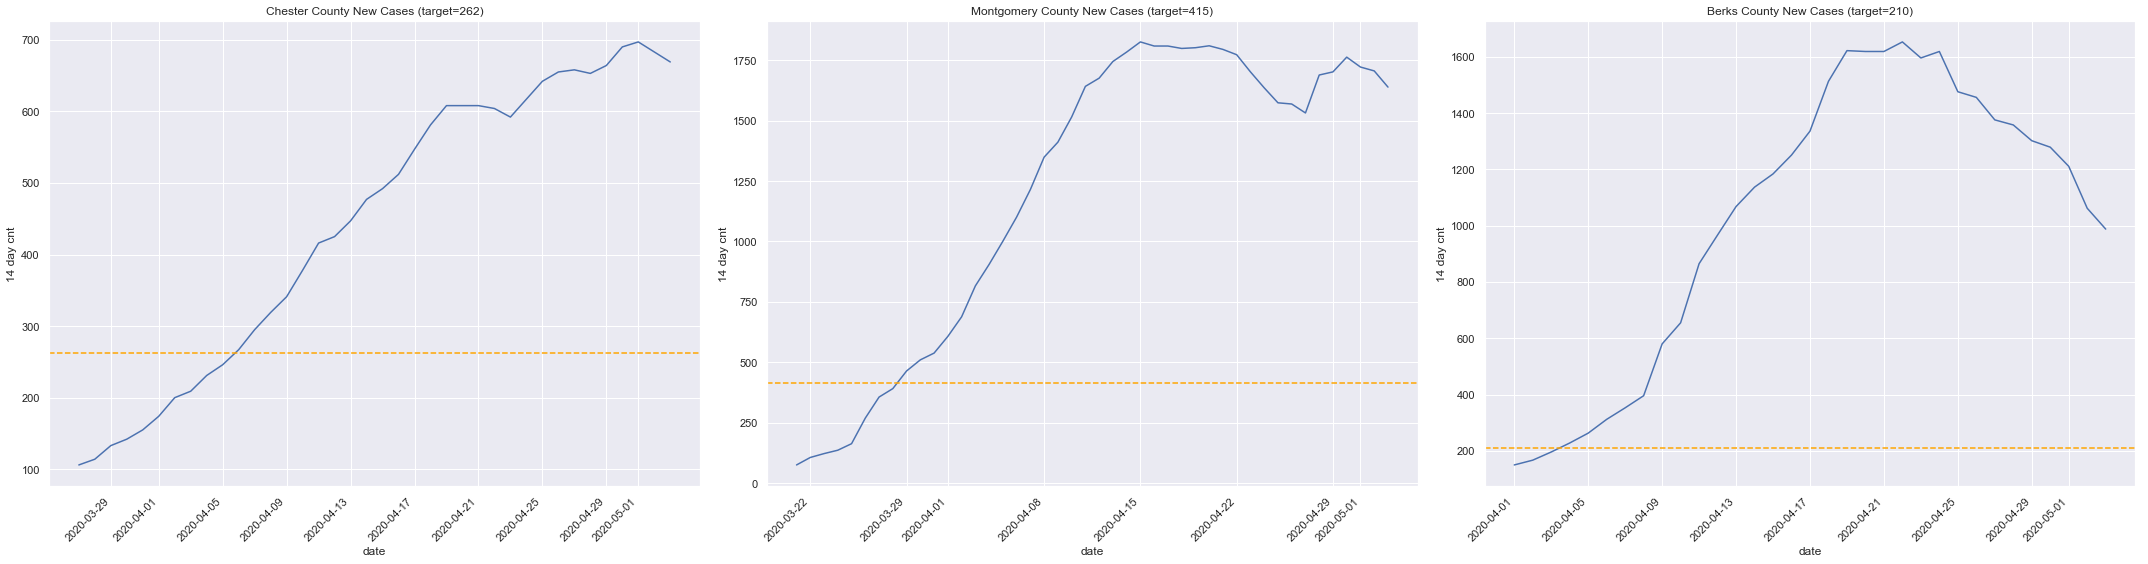

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=False, figsize=(30,8))
sns.lineplot(x='date', y='14 day cnt', ax=ax1, data=df_chester).set(title='Chester County New Cases (target=262)')
sns.lineplot(x='date', y='14 day cnt', ax=ax2, data=df_montgomery).set(title='Montgomery County New Cases (target=415)')
sns.lineplot(x='date', y='14 day cnt', ax=ax3, data=df_berks).set(title='Berks County New Cases (target=210)')
ax1.axhline(262, ls='--', color='orange')
ax2.axhline(415, ls='--', color='orange')
ax3.axhline(210, ls='--', color='orange')
plt.setp(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()